# MNIST Digit Classification

# Step 1: Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Step 2: Load and Preprocess MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Step 3: Build the Neural Network Model

In [ ]:
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model

In [ ]:
# Preprocessing labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

## Training model
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7223 - loss: 0.8678 - val_accuracy: 0.9442 - val_loss: 0.1915
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9264 - loss: 0.2468 - val_accuracy: 0.9582 - val_loss: 0.1388
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9482 - loss: 0.1767 - val_accuracy: 0.9659 - val_loss: 0.1155
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9592 - loss: 0.1385 - val_accuracy: 0.9686 - val_loss: 0.1041
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9645 - loss: 0.1157 - val_accuracy: 0.9719 - val_loss: 0.0935
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9701 - loss: 0.0984 - val_accuracy: 0.9720 - val_loss: 0.0922
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9733 - loss: 0.0875 - val_accuracy: 0.9720 - val_loss: 0.0936
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9749 - loss: 0.0789 - val_accuracy: 0.

# Step 7: Plot Training/Validation Accuracy and Loss

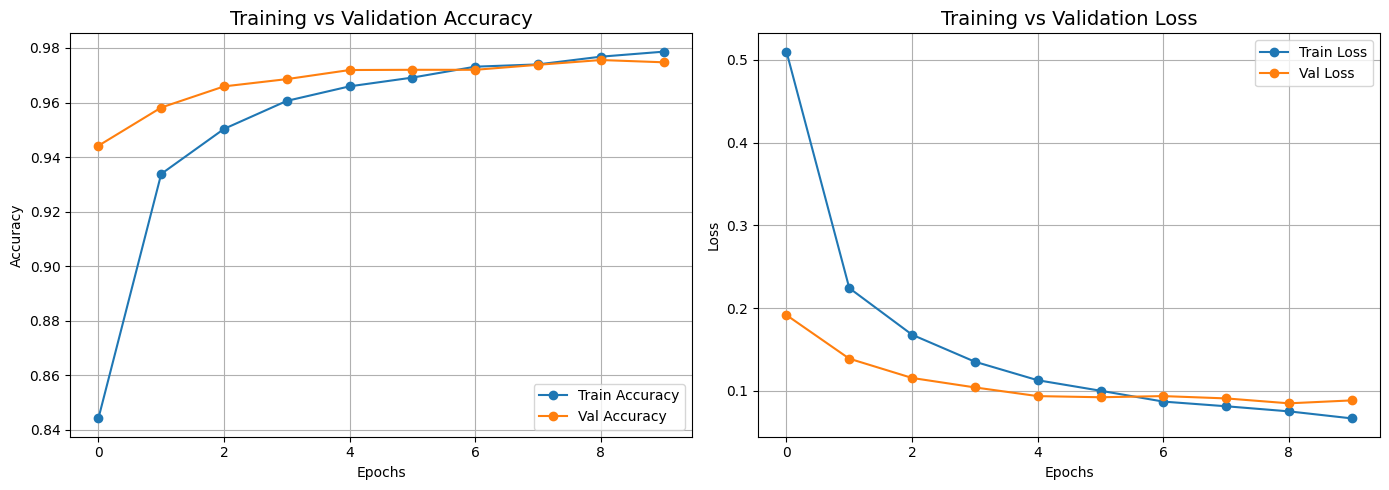

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axs[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
axs[0].set_title("Training vs Validation Accuracy", fontsize=14)
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].grid(True)
axs[0].legend()

# Loss
axs[1].plot(history.history['loss'], label='Train Loss', marker='o')
axs[1].plot(history.history['val_loss'], label='Val Loss', marker='o')
axs[1].set_title("Training vs Validation Loss", fontsize=14)
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

# Step 8: Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


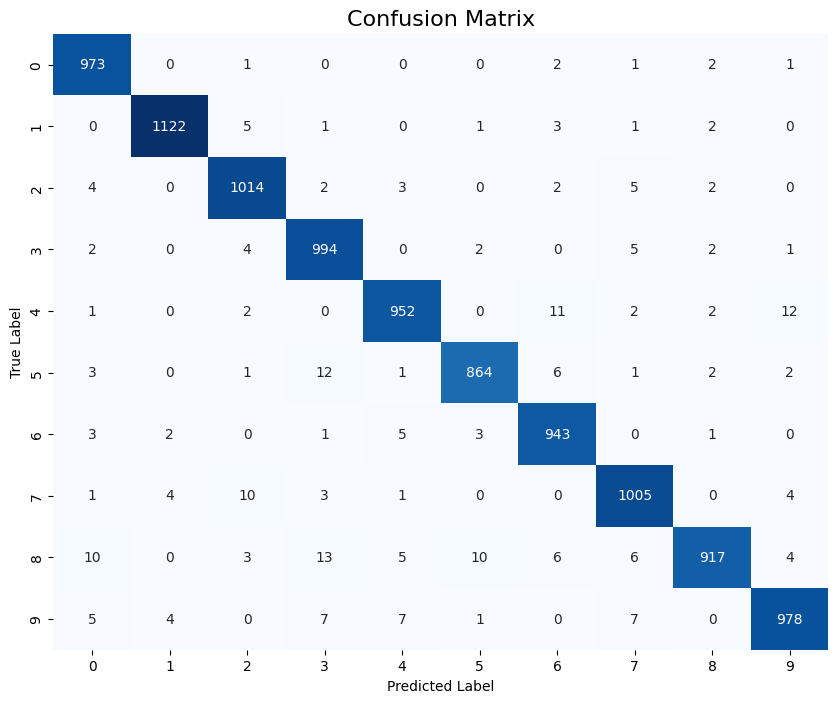

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", fontsize=16)
plt.show()

# Step 9: Classification report

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

# Classification report
report = classification_report(y_test, y_pred, digits=4, output_dict=False)
print("Classification Report:\n")
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0     0.9711    0.9929    0.9818       980
           1     0.9912    0.9885    0.9899      1135
           2     0.9750    0.9826    0.9788      1032
           3     0.9622    0.9842    0.9731      1010
           4     0.9774    0.9695    0.9734       982
           5     0.9807    0.9686    0.9746       892
           6     0.9692    0.9843    0.9767       958
           7     0.9729    0.9776    0.9753      1028
           8     0.9860    0.9415    0.9632       974
           9     0.9760    0.9693    0.9727      1009

    accuracy                         0.9762     10000
   macro avg     0.9762    0.9759    0.9759     10000
weighted avg     0.9763    0.9762    0.9762     10000



# Step 10: Show Misclassified Images

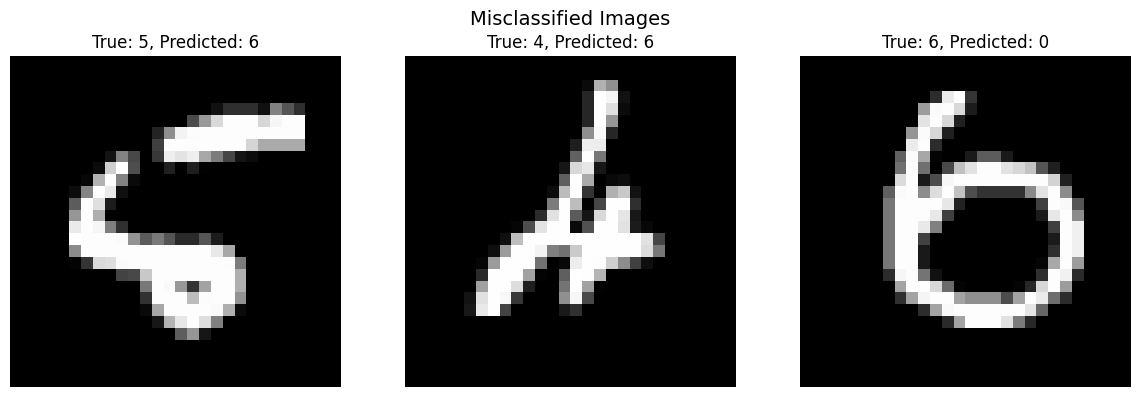

In [ ]:
misclassified = np.where(y_pred != y_test)[0][:3]

plt.figure(figsize=(12, 4))
for idx, wrong in enumerate(misclassified):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(x_test[wrong].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[wrong]}, Predicted: {y_pred[wrong]}", fontsize=12)
    plt.axis('off')
plt.suptitle("Misclassified Images", fontsize=14)
plt.tight_layout()
plt.show()

# Step 11: Saving Model

In [ ]:
model.save('mnist_digit_classifier.h5')